# Gelişmiş Matplotlib Komutları

#### Logaritmik ölçek

Bir veya her iki eksen için logaritmik bir ölçek ayarlamak mümkündür. Bu aslında Matplotlib'deki daha genel bir dönüştürme sisteminin yalnızca bir uygulamasıdır. Eksen ölçeklerinin her biri, bir parametre alan (burada 'log') `set_xscale` ve `set_yscale` yöntemleri kullanılarak ayrı ayrı ayarlanır:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.arange(1,5)

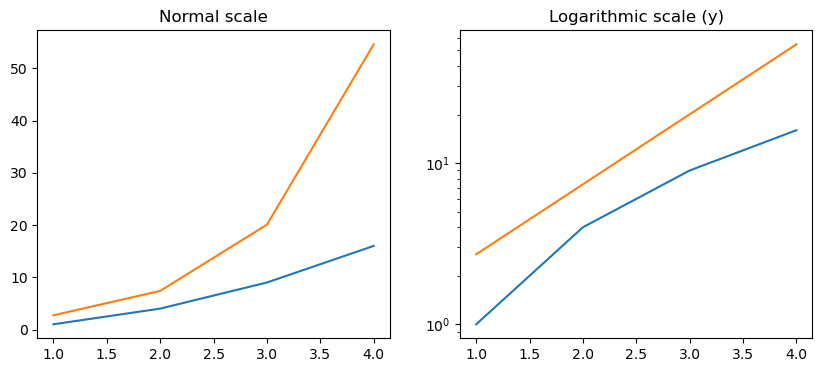

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### tiklerin yerleşimi ve özel tik etiketleri

İnteger değerler listesi alan `set_xticks` ve `set_yticks` komutları ile eksen  işaretçilerinin nereye yerleştirilmesini istediğimizi açıkça belirtebiliriz. Her bir tik (çentik) konumua karşı gelen özel metin etiketlerinin bir listesini ve font büyüklüğünü eksenler için `set_xticklabels` ve `set_yticklabels` komutları ile tanımlayabiliriz: 

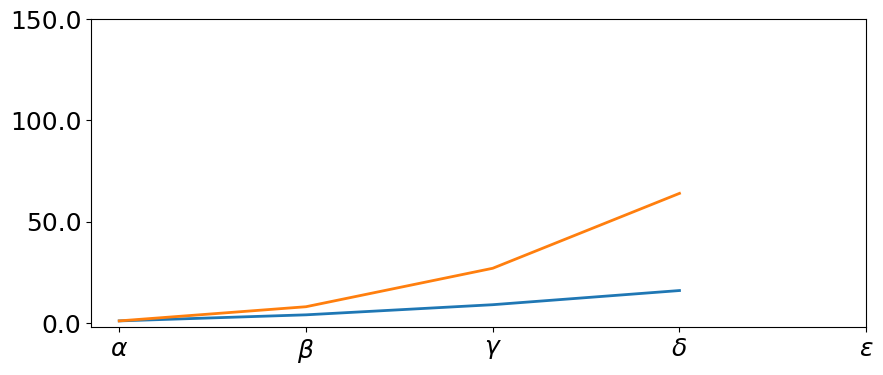

In [4]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', 
                    r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["%.1f" % y for y in yticks], fontsize=18); 
# LaTeX formatlı etiketler kullanabiliriz

#### Bilimsel notasyon
Eksenlerde büyük sayılar yerine bilimsel gösterim kullanmak genellikle daha iyidir:

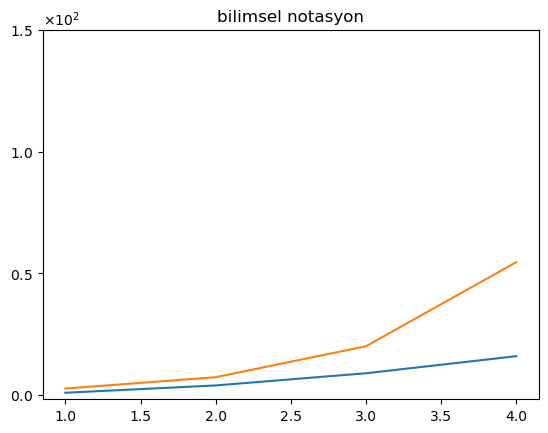

In [5]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("bilimsel notasyon")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

### Eksen numarası ve etiket aralığı

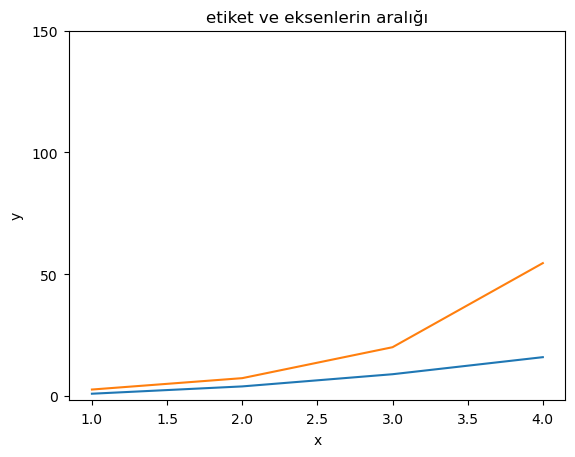

In [6]:
# x ve y eksenleri ile eksenlerdeki sayılar arasındaki mesafe
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("etiket ve eksenlerin aralığı")

# eksen etiketi ve eksen numaraları arasını doldurma
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

ax.set_xlabel("x")
ax.set_ylabel("y");

In [7]:
# varsayılanları geri yükleme
plt.rcParams['xtick.major.pad'] = 3
plt.rcParams['ytick.major.pad'] = 3

#### Eksen konumu ayarlamaları
Ne yazık ki, rakamları kaydederken etiketler bazen kırpılır ve eksenlerin konumlarını biraz ayarlamak gerekebilir. Bu, `subplots_adjust` kullanılarak yapılabilir:

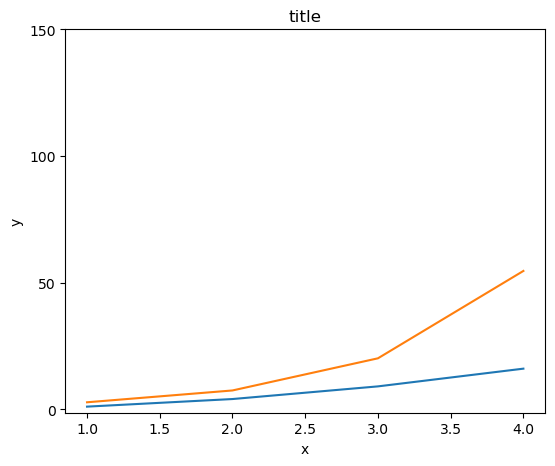

In [8]:
fig, ax = plt.subplots(1, 1)
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

### Eksen ızgarası
axis nesnesindeki `grid` metodu ile grid çizgilerini açıp kapatabiliriz. Ayrıca, `plot` fonksiyonuyla aynı anahtar sözcük argümanlarını kullanarak ızgara çizgilerinin görünümünü özelleştirebiliriz:

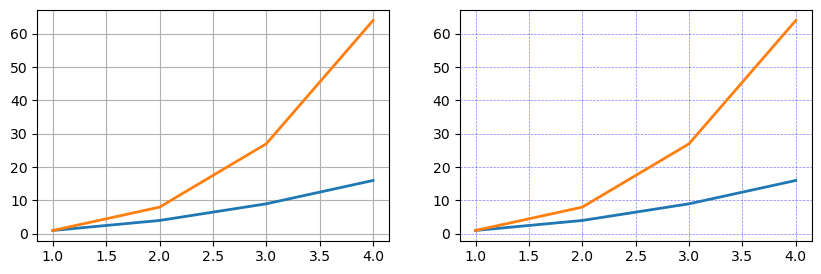

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# varsayılan ızgara görünümü
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# özel ızgara görünümü
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Eksen omurgaları
Eksen omurgalarının özelliklerini de değiştirebiliriz:

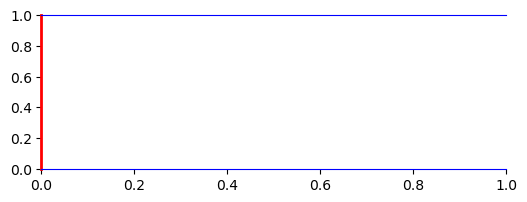

In [10]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# eksen omurgasını sağa çevirin
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # sadece sol taraftaki tikler

### İkiz eksen
Bazen bir şekilde ikili x veya y eksenine sahip olmak yararlıdır; örneğin, farklı birimlerle birlikte eğriler çizerken. Matplotlib bunu `twinx` ve `twiny` fonksiyonlarıyla destekler:

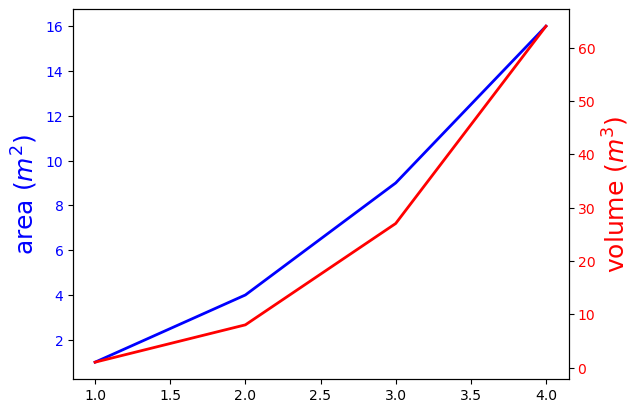

In [11]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### x ve y'nin sıfır olduğu eksenler

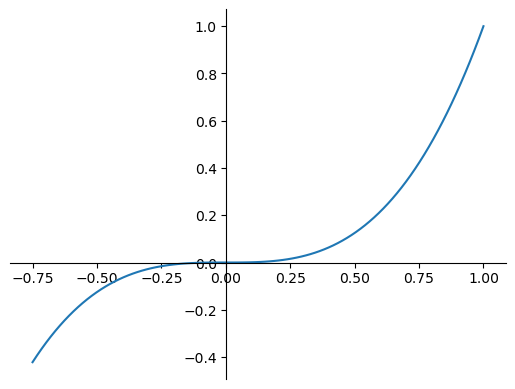

In [12]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) 
# x omurgasının konumunu x=0 olarak ayarla

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   
# y omurgasının konumunu y=0 olarak ayarlayın

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Diğer 2B çizim stilleri
Normal `plot` yöntemine ek olarak, farklı türde grafikler oluşturmak için bir çok başka fonksiyon vardır.

In [13]:
n = np.array([0,1,2,3,4,5])

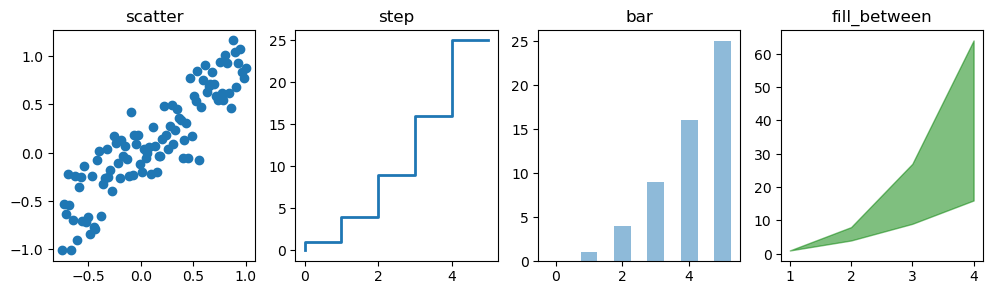

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("scatter")

axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("bar")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("fill_between");

### Metin açıklaması
Matplotlib şekillerinde metin açıklamaları `text` fonksiyonu kullanılarak yapılabilir. Eksen etiketi metinleri ve başlıkları gibi LaTeX biçimlendirmesini destekler:

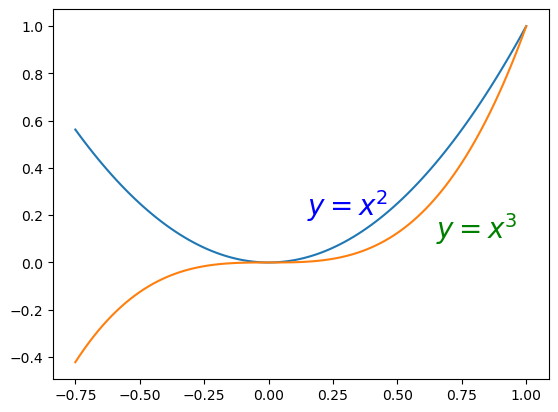

In [15]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

### Çoklu subplots ve ilaveler içeren Figure'ler
Eksenler, `fig.add_axes` kullanılarak veya 'subplots', 'subplot2grid' veya 'gridspec' gibi bir alt figure düzeni yöneticisi kullanılarak bir matplotlib Şekil tuvaline manuel olarak eklenebilir:

#### subplots

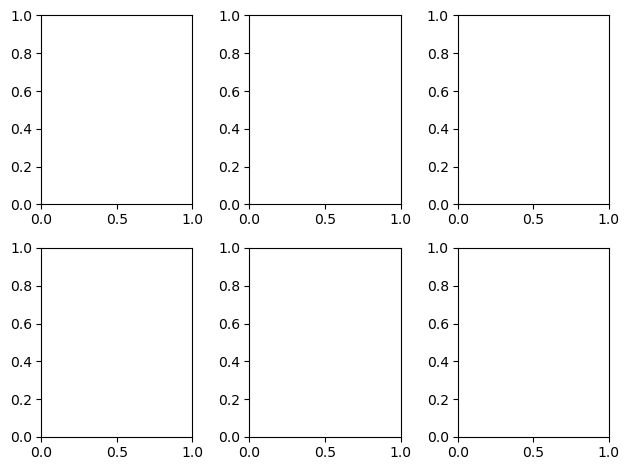

In [17]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

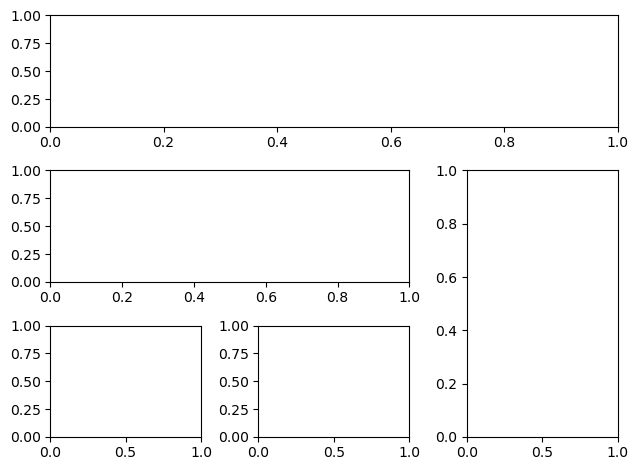

In [18]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [19]:
import matplotlib.gridspec as gridspec

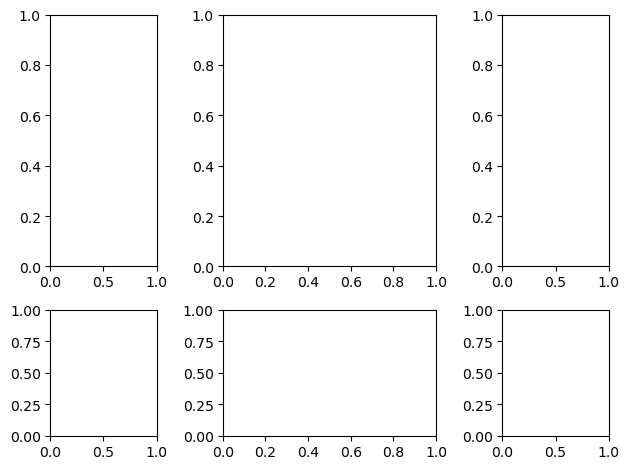

In [20]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

#### add_axes
Eksenleri `add_axes` ile manuel olarak eklemek, figure'lere ilaveler eklemek için kullanışlıdır:

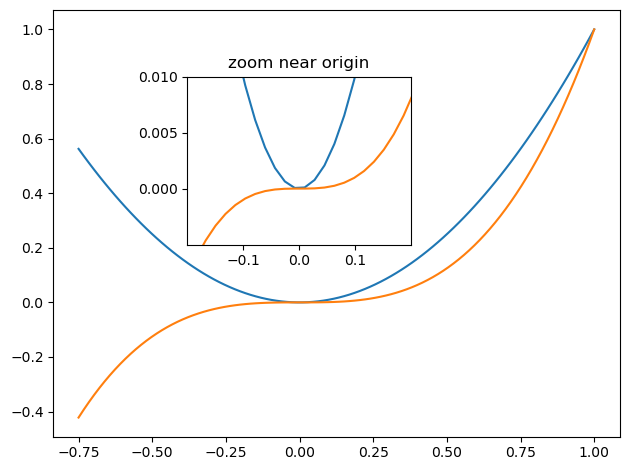

In [22]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.3, 0.48, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

### Colormap ve contour figures
Renk haritaları ve kontur figürleri, iki değişkenli fonksiyonların çizilmesi için kullanışlıdır. Bu fonksiyonların çoğunda, verilerin bir boyutunu kodlamak için bir renk haritası kullanacağız. Bir dizi önceden tanımlanmış renk haritası vardır. Özel renk haritalarını tanımlamak nispeten basittir.

In [23]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [24]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

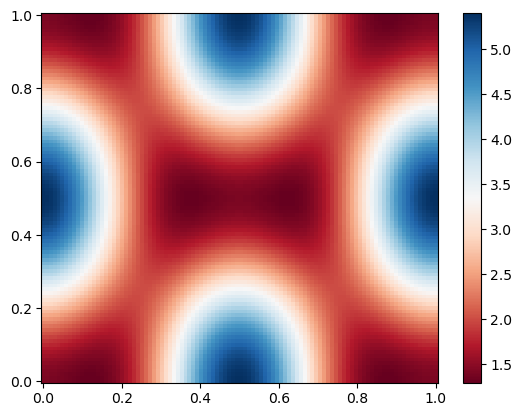

In [25]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=plt.cm.RdBu, 
              vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

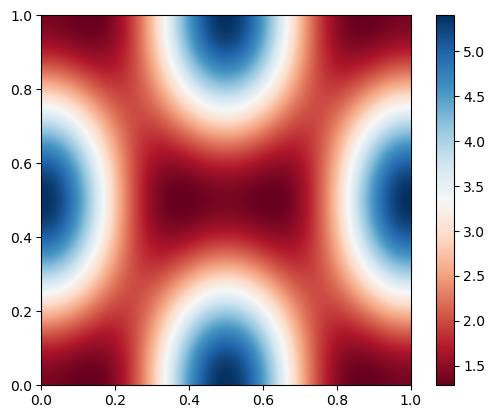

In [26]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), 
               vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

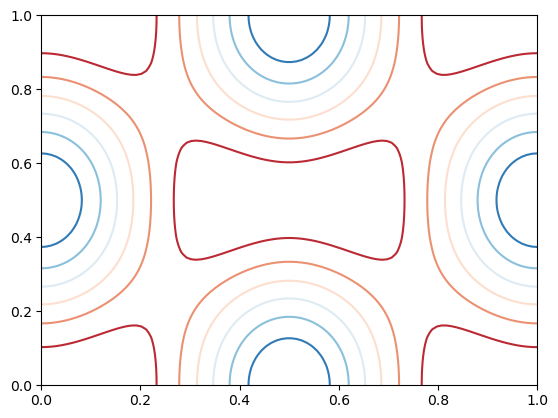

In [27]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), 
                 vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D figures
3D grafikleri matplotlib'de kullanmak için önce `Axes3D` sınıfının bir örneğini oluşturmamız gerekiyor. 3D eksenler, bir matplotlib şekil tuvaline 2D eksenlerle tam olarak aynı şekilde eklenebilir; veya daha uygun olarak,  `add_axes` veya  `add_axes` yöntemlerine bir `projection='3d'` anahtar kelime argümanı ileterek.

In [28]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Yüzey çizimleri

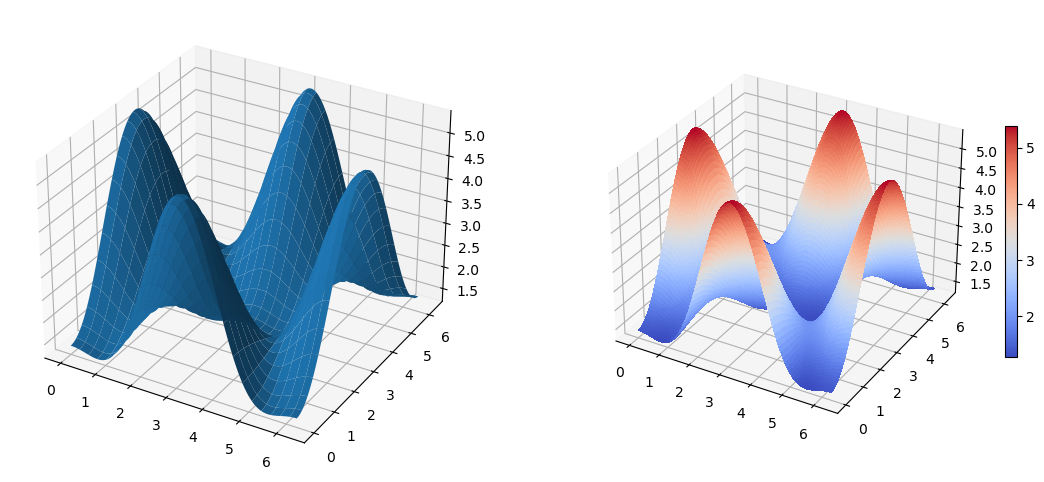

In [29]:
fig = plt.figure(figsize=(14,6))

# 'ax', add_subplot'a projeksiyon='3d' anahtar kelime 
# argümanı nedeniyle 3D-farkında bir eksen örneğidir
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# renk derecelendirme ve renk çubuğu ile surface_plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                    cmap=plt.cm.coolwarm, linewidth=0, 
                    antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Izgara-çerçeve çizimi (Wire-frame plot)

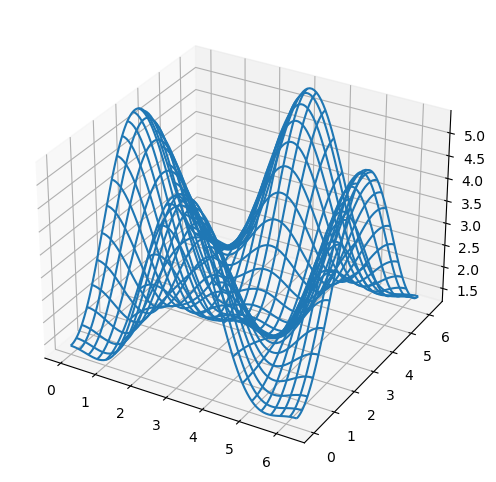

In [30]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Projeksiyonlu Kontur çizimleri

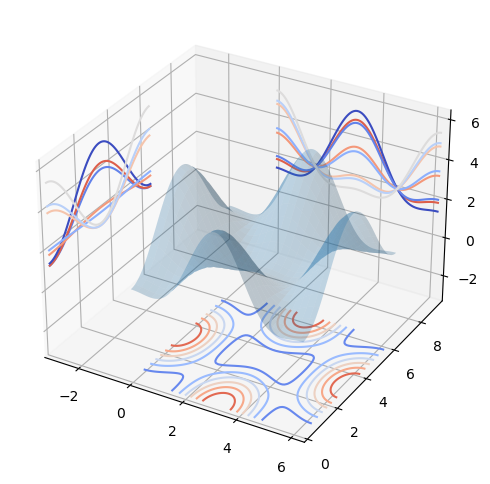

In [31]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, 
                  cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, 
                  cmap=plt.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, 
                  cmap=plt.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

# SON!